<a href="https://colab.research.google.com/github/hajajaved/The-Sparks-Foundation-tasks/blob/main/GRIP_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction using Supervised ML**

# Simple Linear Regression

# Data: http://bit.ly/w-data

# Author - Haja Javed Ahmed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Reading data from provided URL**

In [2]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print('Data is of the size', df.shape)

print(f"Number of rows= {df.shape[0]}")
print(f"Number of columns= {df.shape[1]}")

Data is of the size (25, 2)
Number of rows= 25
Number of columns= 2


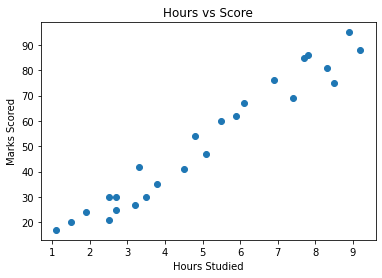

In [5]:
x=df['Hours']
y=df['Scores']
plt.scatter(x, y)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.show()

#**Training the Machine Learning Model** 



> **Identifying dependent and independent variables**







In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]




> **Spliting identified variables into train and test datasets using scikitlearn** 



In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [9]:
print(x_train)
print(x_test)

print(y_train)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


In [10]:
print("Length of train dataset= ",len(x_train))
print("Length of test dataset= ",len(x_test))

Length of train dataset=  20
Length of test dataset=  5


**Training the Linear Regression model using train dataset**

In [11]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing trained Linear Regression model using test dataset**

In [12]:
print("x_test values:")
print(x_test)
y_pred = slr.predict(x_test)
print()
print("Predicting Scores:")
print(y_pred)

x_test values:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

Predicting Scores:
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**Visualizing the training dataset**

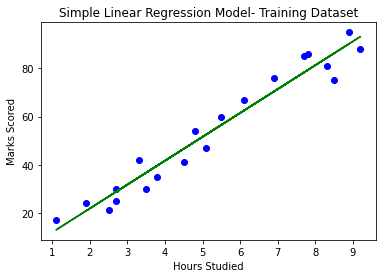

In [13]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, slr.predict(x_train), color = "green")
plt.title("Simple Linear Regression Model- Training Dataset")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")

plt.show()

**Predicting score if a student studies for 9.25 hrs/ day**

In [14]:
hrs=9.25
print("Hours studied=", hrs)
scr=slr.predict([[hrs]])
print(f"Score= {scr[0]}")

Hours studied= 9.25
Score= 93.69173248737539


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 score:', metrics.r2_score(y_test, y_pred))
print(f"Efficiency of trained model: {slr.score(x_test, y_test)*100}%")

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2 score: 0.9454906892105354
Efficiency of trained model: 94.54906892105353%
